# **Data Analysis and Manipulation Topics using Pandas**
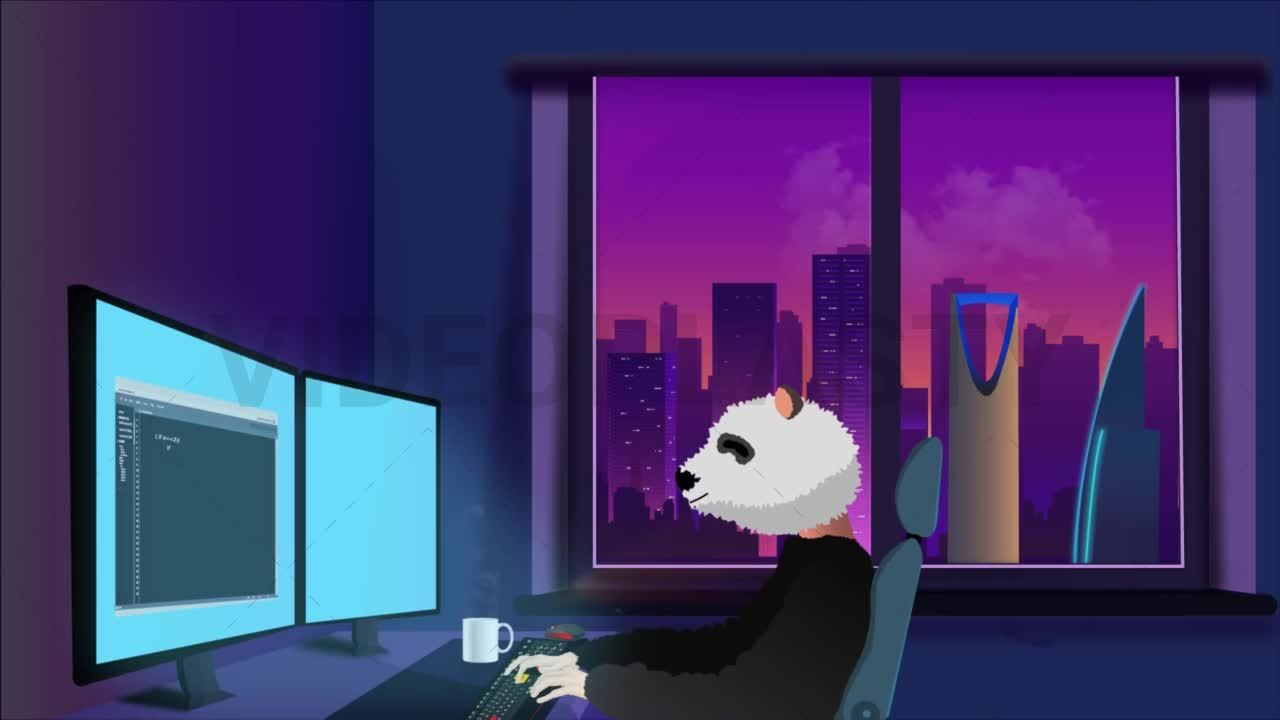

pandas is a data analysis library for Python that has exploded in
popularity over the past years. The website describes it thusly:

“pandas is an open source, BSD-licensed library providing high performance,
easy-to-use data structures and data analysis tools for
the Python programming language.”                                                  
-pandas.pydata.org

pandas contains data structures and data manipulation tools designed to make data cleaning and analysis fast and easy in Python. we are going to discuss 5 techniques used in data wrangling.

**Importing data**

We are going over how we can import a text file or .csv file that has a data set into python. So it's basically going to be how you can import data into python script using python library called pandas, which is basically the most common python library that we use in order to import data into python.

We will import some .csv file related to out of school rates global data sourced from Unicef. Firstly, we are going to import pandas library. Then, in order to read tex file of .csv file we are going to give the name of the function that i want to call. So, We are going to set some variable names which data & data1 that hold my dataframe. 

In [35]:
import pandas as pd
data = pd.read_csv('Primary.csv', encoding='latin-1')
data1 = pd.read_csv('Upper Secondary.csv', encoding='latin-1')

Passing .head() which is optional parameter to read the first rows as the column names.Then when we look at the output on terminal of the head, it looks like the dataset was loaded in correctly. 

In [36]:
data.head()

,ISO3,Countries and areas,Region,Sub-region,Development Regions,Total,Female,Male,Rural_Residence,Urban_Residence,Poorest_Wealth quintile,Second_Wealth quintile,Middle_Wealth quintile,Fourth_Wealth quintile,Richest_Wealth quintile,Data source,Time period
0,AFG,Afghanistan,SA,SA,Least Developed,37.0,47.0,28.0,42.0,19.0,42.0,47.0,46.0,32.0,16.0,DHS 2015,2015.0
1,ALB,Albania,ECA,EECA,More Developed,2.0,2.0,3.0,4.0,1.0,4.0,3.0,2.0,2.0,1.0,DHS 2017-18,2018.0
2,DZA,Algeria,MENA,MENA,Less Developed,2.0,2.0,2.0,2.0,2.0,3.0,2.0,2.0,2.0,1.0,MICS 2012-13,2013.0
3,AND,Andorra,ECA,WE,More Developed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AGO,Angola,SSA,ESA,Least Developed,22.0,22.0,21.0,35.0,14.0,39.0,33.0,19.0,12.0,5.0,DHS 2015-16,2016.0


If we want for example the shape of te data set. So, if we want to know how many rows of the data do we have and how many columns are in the data set, we can do the variable name of our dataframe either data or data1 passing it into .shape and print it out. the first number between parentheses indicates the row numbers and the second one indicates the columns numbers.

In [37]:
print(data.shape)

(202, 17)


Second example is importing data from URL. The same thing from the last time, instead of passing in the path or the URL directly into read_csv 

In [38]:
URL = 'http://users.stat.ufl.edu/~winner/data/resid_energy.dat'
df = pd.read_csv(URL)
df.head()

,1984 235.83 3.93 2.69 44.80 20.17 5.72 7.57 15.96
0,1985 237.92 4.22 2.67 45.64 20....
1,1986 240.13 4.46 2.66 47.26 19....
2,1987 242.29 4.74 2.64 47.85 19....
3,1988 244.50 5.10 2.62 48.22 18....
4,1989 246.82 5.48 2.63 49.08 18....


**Apply a function** 

Pandas Apply function returns some value after passing each row/column of a data frame with some function. The function accepts Series objects with an index equal to the DataFrame's row (axis=0) or the DataFrame's columns (axis=1).

We will do some changes based on values of used in DataFrame. 



In [39]:
import numpy as np
data = pd.read_csv("Primary.csv", encoding='latin-1')
data.head()

,ISO3,Countries and areas,Region,Sub-region,Development Regions,Total,Female,Male,Rural_Residence,Urban_Residence,Poorest_Wealth quintile,Second_Wealth quintile,Middle_Wealth quintile,Fourth_Wealth quintile,Richest_Wealth quintile,Data source,Time period
0,AFG,Afghanistan,SA,SA,Least Developed,37.0,47.0,28.0,42.0,19.0,42.0,47.0,46.0,32.0,16.0,DHS 2015,2015.0
1,ALB,Albania,ECA,EECA,More Developed,2.0,2.0,3.0,4.0,1.0,4.0,3.0,2.0,2.0,1.0,DHS 2017-18,2018.0
2,DZA,Algeria,MENA,MENA,Less Developed,2.0,2.0,2.0,2.0,2.0,3.0,2.0,2.0,2.0,1.0,MICS 2012-13,2013.0
3,AND,Andorra,ECA,WE,More Developed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AGO,Angola,SSA,ESA,Least Developed,22.0,22.0,21.0,35.0,14.0,39.0,33.0,19.0,12.0,5.0,DHS 2015-16,2016.0


concatenates all of the lists of columns (Countries and areas) & (sub-region) and validates that this new list contains the same exact values as the original columns lists.

In [40]:
#concatenate two column
def concatenate(col1, col3) :
  return str(col1) + '>>' + str([col3])
data['Region_plus_Subregion'] = data[['Countries and areas', 'Sub-region']].apply(lambda x:
                                                                                  concatenate(x['Countries and areas'],x['Sub-region']),axis=1)
data.head() 

,ISO3,Countries and areas,Region,Sub-region,Development Regions,Total,Female,Male,Rural_Residence,Urban_Residence,Poorest_Wealth quintile,Second_Wealth quintile,Middle_Wealth quintile,Fourth_Wealth quintile,Richest_Wealth quintile,Data source,Time period,Region_plus_Subregion
0,AFG,Afghanistan,SA,SA,Least Developed,37.0,47.0,28.0,42.0,19.0,42.0,47.0,46.0,32.0,16.0,DHS 2015,2015.0,Afghanistan>>['SA']
1,ALB,Albania,ECA,EECA,More Developed,2.0,2.0,3.0,4.0,1.0,4.0,3.0,2.0,2.0,1.0,DHS 2017-18,2018.0,Albania>>['EECA']
2,DZA,Algeria,MENA,MENA,Less Developed,2.0,2.0,2.0,2.0,2.0,3.0,2.0,2.0,2.0,1.0,MICS 2012-13,2013.0,Algeria>>['MENA']
3,AND,Andorra,ECA,WE,More Developed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Andorra>>['WE']
4,AGO,Angola,SSA,ESA,Least Developed,22.0,22.0,21.0,35.0,14.0,39.0,33.0,19.0,12.0,5.0,DHS 2015-16,2016.0,Angola>>['ESA']


In [41]:
Female_and_male_p = data.loc[:, ['Countries and areas', 'Female', 'Male']]
Female_and_male_p.head()

,Countries and areas,Female,Male
0,Afghanistan,47.0,28.0
1,Albania,2.0,3.0
2,Algeria,2.0,2.0
3,Andorra,NaN,NaN
4,Angola,22.0,21.0


**Merge Operation**

Joining or merging functions By linking rows with one or more keys, you can integrate datasets. Here, we use the merge method to combine the Primary.csv and Upper secondary.csv  to start combining DataFrames horizontally.

In [43]:
data2 = pd.read_csv('Upper Secondary.csv', encoding='latin-1')
Female_and_male_s = data2.loc[:, ['Countries and areas', 'Female', 'Male']]
Female_and_male_s.head()

,Countries and areas,Female,Male
0,Afghanistan,73.0,43.0
1,Albania,12.0,12.0
2,Algeria,23.0,28.0
3,Andorra,NaN,NaN
4,Angola,35.0,21.0


In [44]:
pd.merge(Female_and_male_p, Female_and_male_s, suffixes=['_p','_s'], on='Countries and areas', how='outer').head()

,Countries and areas,Female_p,Male_p,Female_s,Male_s
0,Afghanistan,47.0,28.0,73.0,43.0
1,Albania,2.0,3.0,12.0,12.0
2,Algeria,2.0,2.0,23.0,28.0
3,Andorra,NaN,NaN,NaN,NaN
4,Angola,22.0,21.0,35.0,21.0


By merging 2 DataFrames we have noticed that that percentage of Out of School Rates between primary education age (between 6 and 13 years old) and upper secondary education age (between 14 to 16 years) have increased percentage between male and female which make sence.

merge table

**Groupby Operation**

In this part we highlight the amazing groupby method, that enables us to aggregate our data in any way you want and execute any function to each group separately before producing a single dataset.

 We will take primary dataset as an example and execute mean function to column Total which refer to total % of children who were out of schools by each region is provided

In [45]:
data.groupby('Region').Total.mean()

Region
EAP      4.142857
ECA      2.250000
LAC      2.086957
MENA     5.444444
SA      11.125000
SSA     20.428571
Name: Total, dtype: float64

Then we will execute min, max and mean functions to our provided dateset.

In [46]:
data.groupby('Region').Total.agg(['min', 'max', 'mean'])

,min,max,mean
Region,,,
EAP,1.0,10.0,4.142857
ECA,0.0,8.0,2.250000
LAC,0.0,8.0,2.086957
MENA,1.0,23.0,5.444444
SA,1.0,37.0,11.125000
SSA,1.0,72.0,20.428571


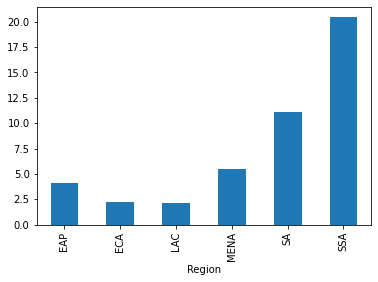

In [47]:
%matplotlib inline 
data.groupby('Region').Total.mean().plot (kind='bar')

We notice that SSA (Sub-Saharan Africa) has the highest percentage of children who were out of schools. And ECA (Eastern Europe) and LAC (Latin America and the Caribbean) have lowest percentage.

**Data binning**

Data binning, also called discrete binning or bucketing, is a data pre-processing technique used to reduce the effects of minor observation errors. The original data values which fall into a given small interval, a bin, are replaced by a value representative of that interval, often the central value. It is a form of quantization. 

Statistical data binning is a way to group numbers of more or less continuous values into a smaller number of "bins".

In our data we will classify % of children who were out of school and were residing in Rural area into bins with name indicating the eductional quality in this country.

In [48]:
R = data.loc[:, ['Countries and areas', 'Rural_Residence']]
print(R)

                    Countries and areas  Rural_Residence
0                           Afghanistan             42.0
1                               Albania              4.0
2                               Algeria              2.0
3                               Andorra              NaN
4                                Angola             35.0
..                                  ...              ...
197  Venezuela (Bolivarian Republic of)              NaN
198                            Viet Nam              2.0
199                               Yemen             27.0
200                              Zambia             19.0
201                            Zimbabwe              5.0

[202 rows x 2 columns]


In [49]:
bins=[0 ,20, 40, 60]
score = ['high eduction', 'average eduction', 'poor eduction']
data['quality index'] = pd.cut(data['Rural_Residence'], bins, labels = score)
data.loc[:, ['Countries and areas','Rural_Residence', 'Development Regions', 'quality index']]

,Countries and areas,Rural_Residence,Development Regions,quality index
0,Afghanistan,42.0,Least Developed,poor eduction
1,Albania,4.0,More Developed,high eduction
2,Algeria,2.0,Less Developed,high eduction
3,Andorra,NaN,More Developed,NaN
4,Angola,35.0,Least Developed,average eduction
...,...,...,...,...
197,Venezuela (Bolivarian Republic of),NaN,Less Developed,NaN
198,Viet Nam,2.0,Less Developed,high eduction
199,Yemen,27.0,Least Developed,average eduction
200,Zambia,19.0,Least Developed,high eduction


We notice after excution of our code a direct correlation between the development level and eductional level in this countries.